https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/linear_regression/main.py#L22-L23

# Linear regression

Линейная регрессия - это фундаментальный метод, который позволяет анализировать и моделировать отношение между переменными. Этот метод используется для прогнозирования и понимания, как одна переменная зависит от другой или нескольких других переменных.

## Основные понятия

- **Целевая переменная (Target Variable)**: Это переменная, которую мы пытаемся предсказать или объяснить. В линейной регрессии она также называется зависимой переменной.

- **Признаки (Features)**: Это независимые переменные, которые мы используем для предсказания целевой переменной. Их также называют предикторами.

- **Уравнение линейной регрессии для одного признака**: Оно описывает связь между признаками и целевой переменной. Обычно это уравнение имеет вид: 

    `y = w * x + b`

  где:
  - `y` - целевая переменная
  - `w` - вес (коэффициент), который показывает влияние признака `x`
  - `x` - признак
  - `b` - свободный член (смещение)
  
- **Уравнение линейной регрессии для нескольких признаков**: Оно описывает связь между признаками и целевой переменной. Обычно это уравнение имеет вид: 

    `y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε`

  где:
  - `y` - целевая переменная
  - `β₀` - свободный член (смещение)
  - `β₁, β₂, ... , βₙ` - коэффициенты (веса), которые показывают влияние каждого признака
  - `x₁, x₂, ... , xₙ` - признаки

## Цель линейной регрессии

Цель линейной регрессии - найти такие значения веса `w` и свободного члена `b`, которые минимизируют сумму квадратов ошибок (сумма квадратов остатков) и лучше всего соответствуют данным. Это позволяет нам строить модель, которая может делать предсказания и объяснять отношения между переменными

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [3]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


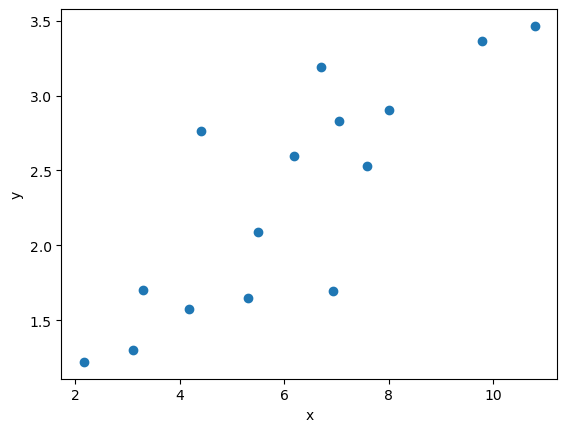

In [4]:
plt.plot(x_train, y_train, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)

In [6]:
# Параметры модели (вес и смещение), инициализированные нулевыми значениями
w = torch.tensor(0., requires_grad=True)
b = torch.tensor(0., requires_grad=True)

# 100 итераций обучения модели
for i in range(100):
    y = w * x_train + b
    loss = torch.sum((y - y_train)**2) / 15 # Это функция потерь, которая измеряет разницу между предсказанными 
                                            # значениями y и фактическими значениями y_train. Эта функция потерь 
                                            # использует среднеквадратичную ошибку (MSE) и делит результат на 15 
                                            # (нормализация).
    loss.backward()                         # Обратное распространение ошибки для вычисления градиентов параметров w и b
    
    # Параметры обновляются с использованием градиентного спуска
    with torch.no_grad():
        w -= 0.001 * w.grad
        b -= 0.001 * b.grad
    
    # Обнуляем градиенты w и b, чтобы гарантировать, что они не накапливаются между итерациями
    w.grad.zero_()
    b.grad.zero_()
    #print(loss.item())

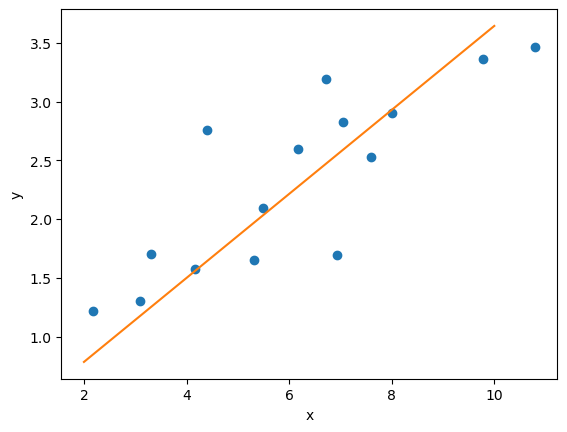

In [7]:
plt.plot(x_train, y_train, 'o')
xx = np.linspace(2, 10, 100)
plt.plot(xx, w.item() * xx + b.item())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
# Linear regression model
model = torch.nn.Linear(input_size, output_size)    # y = w * x + b
                                                    # input_size указывает на количество входных признаков
                                                    # output_size указывает на количество выходных признаков

In [9]:
model(torch.tensor([[0.], [1.], [2.]]))

tensor([[-0.2072],
        [-0.7672],
        [-1.3271]], grad_fn=<AddmmBackward0>)

In [10]:
input_size, output_size

(1, 1)

In [11]:
# Список параметров модели
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[-0.5599]], requires_grad=True)
Parameter containing:
tensor([-0.2072], requires_grad=True)


In [12]:
# Список параметров модели c именами параметров
for name, p in model.named_parameters():
    print('name:', name, p)

name: weight Parameter containing:
tensor([[-0.5599]], requires_grad=True)
name: bias Parameter containing:
tensor([-0.2072], requires_grad=True)


In [13]:
model

Linear(in_features=1, out_features=1, bias=True)

In [14]:
model.weight

Parameter containing:
tensor([[-0.5599]], requires_grad=True)

In [15]:
model.bias

Parameter containing:
tensor([-0.2072], requires_grad=True)

In [16]:
model(torch.tensor([10.]))

tensor([-5.8064], grad_fn=<ViewBackward0>)

In [17]:
# Loss function (разница между предсказанными значениями и фактическими значениями)
criterion = torch.nn.MSELoss()

In [18]:
# Первый тензор представляет предсказанные значения, а второй тензор представляет фактические значения
criterion(torch.tensor([1,2,3.]), torch.tensor([3,2,1.]))

tensor(2.6667)

Оптимизатор стохастического градиентного спуска (SGD) для обновления параметров модели (`model.parameters()`) с заданной скоростью обучения (`lr=learning_rate`). Оптимизатор будет использоваться для обучения модели с учетом градиентов

In [19]:
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [20]:
learning_rate # Значение скорости обучения, которое используется в оптимизаторе

0.001

In [21]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


Этот код представляет собой стандартный цикл обучения нейронной сети  с использованием библиотеки PyTorch, включая передачу данных через модель, расчёт потерь, обратное распространение ошибки и обновление параметров с оптимизатором

In [22]:
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

# Train the model
for epoch in range(num_epochs):     # num_epochs – количество эпох обучения (количество полных проходов через 
                                    # весь набор данных)
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # W(t+1) = W(t) - lr * W.grad
    
    # Вывод значения функции потерь каждые 5 эпох для мониторинга процесса обучения
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [5/60], Loss: 19.0759
Epoch [10/60], Loss: 7.8806
Epoch [15/60], Loss: 3.3450
Epoch [20/60], Loss: 1.5074
Epoch [25/60], Loss: 0.7629
Epoch [30/60], Loss: 0.4611
Epoch [35/60], Loss: 0.3387
Epoch [40/60], Loss: 0.2890
Epoch [45/60], Loss: 0.2688
Epoch [50/60], Loss: 0.2604
Epoch [55/60], Loss: 0.2569
Epoch [60/60], Loss: 0.2553


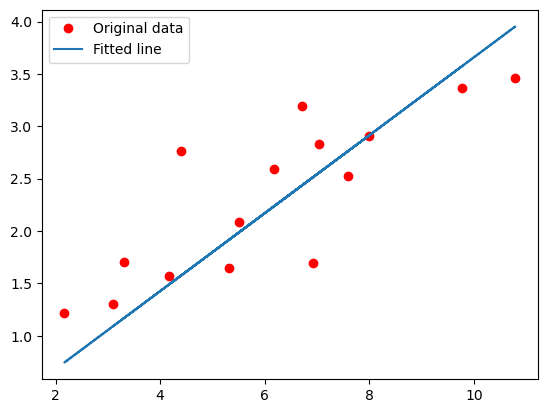

In [23]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

Эта строка кода сохраняет параметры модели в файл с именем `'model.ckpt'`. `model.state_dict()` возвращает словарь, который содержит все параметры модели (веса и смещения). `torch.save` используется для сериализации этого словаря и сохранения его в файле `'model.ckpt'`. Это полезно, чтобы в дальнейшем можно было восстановить состояние модели для использования или продолжения обучения

In [24]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Этот вызов возвращает словарь, содержащий параметры модели. Этот словарь может быть использован, например, для сохранения параметров модели в файл, как это сделано в коде выше, или для загрузки параметров обратно в модель для продолжения обучения или инференса (инференс (инференция) в контексте машинного обучения и искусственного интеллекта означает процесс использования обученной модели для выполнения предсказаний или классификации на новых или невиданных данных. )

In [25]:
model.state_dict()

OrderedDict([('weight', tensor([[0.3719]])), ('bias', tensor([-0.0605]))])